# Scientific methodology and performance evaluation project

# The SARS-CoV-2 (Covid-19) pandemic

_Author Milena Marković (<milena.markovic@grenoble-inp.org>)_

In this computational notebook, we will explore the evolution of the 2020 Covid-19 pandemic confirmed case numbers.

## Dataset description

The dataset that is used in this analysis is a table containing a time series of confirmed cases per country. It is compiled by the [Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE)](https://systems.jhu.edu/). Australia, Canada and China are reported at the province/state level. Dependencies of the Netherlands, the UK, France and Denmark are listed under the province/state level. The US and other countries are reported at the country level. The dataset can be found on the following [link](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv) (raw CSV file linked [here](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv))

### Data format

The file contains an essentially undefined amount of columns out of which the first 4 represent the province name, country name, latitude and longitude of the center of the country/province. The next N columns represent the count of total confimed cases since the start of the epidemic in China - 1/22/20. The data is updated and each day, a new column is added with the total count of confirmed cases on the previous day (as of the moment of writing this document on 22/12/2020, the total count is 339 out of which 335 are date columns).

### Tools

For data manipulation and visualization, we will use three Python libraries: matplotlib, mplcursors and pandas. We will start off by importing these libraries into this computational notebook. We will also pick the _nbagg_ as the matplotlib backend in order to support interactive charts (more information on this [here](https://matplotlib.org/3.1.1/users/prev_whats_new/whats_new_1.4.html#the-nbagg-backend)).

In [137]:
import pandas as pd
import mplcursors

%matplotlib nbagg
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

The next step we will take is to fetch the updates dataset from the GitHub source and display a preview of the fetched data.

In [2]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

data_frame = pd.read_csv(data_url, delimiter=',')
data_frame.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,48527,48718,48952,49161,49378,49621,49681,49817,50013,50190
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,48530,49191,50000,50637,51424,52004,52542,53003,53425,53814
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,92102,92597,93065,93507,93933,94371,94781,95203,95659,96069
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7338,7382,7382,7446,7466,7519,7560,7577,7602,7633
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,16188,16277,16362,16407,16484,16562,16626,16644,16686,16802


## Reproducing the graph

We want to produce a graph from the SCMP Coronavirus webpage that shows and compares the evolution of the cumulative number of cases over time for: Belgium, China (all provinces except Hong Kong), China, Hong-Kong, France except Dom/Tom, Germany, Iran, Italy, Japan, Korea South, Netherlands without the colonies, Portugal, Spain, United Kingdom without the colonies and the United States.

The data from China are organized by provinces and we have separated Hong-Kong, not in order the take a side in the tensions between the province and the Chinese state, but because this is how the data appears on the SCMP website.

### Data query

First off, we need to select data for all of the listed countries, except for China which will be selected separately later on. The criteria that we choose is that either: 
1. the _Country/Region_ value is contained in the list ```countries_excluding_china``` and that, since for all countries we want to show data only for the mainland of the country, the _Province/State_ column is empty.
2. the _Province/State_ column has the value 'Hong Kong' since we want to display this data separately from the data for Mainland China.

In [3]:
countries_excluding_china = ['Belgium', 'France', 'Germany', 'Iran', 'Italy', 'Japan', 'Korea, South', 'Netherlands', 'Portugal', 'Spain', 'United Kingdom', 'US']
select_countries = pd.DataFrame(data_frame.loc[(data_frame['Country/Region'].isin(countries_excluding_china)) & (data_frame['Province/State'].isnull()) | (data_frame['Province/State'] == 'Hong Kong')])

select_countries

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20
23,NaN,Belgium,50.833300,4.469936,0,0,0,0,0,0,...,608137,609211,611422,615058,618204,621039,623760,625930,626911,629109
70,Hong Kong,China,22.300000,114.200000,0,2,2,5,8,8,...,7541,7623,7721,7803,7899,7969,8078,8152,8237,8300
128,NaN,France,46.227600,2.213700,0,0,2,3,3,3,...,2376228,2379291,2390419,2407983,2426063,2441737,2458839,2471458,2477255,2488889
132,NaN,Germany,51.165691,10.451526,0,0,0,0,0,1,...,1350810,1357261,1391086,1423830,1454009,1486839,1508518,1514962,1534218,1570371
147,NaN,Iran,32.427908,53.688046,0,0,0,0,0,0,...,1108269,1115770,1123474,1131077,1138530,1145651,1152072,1158384,1164535,1170743
151,NaN,Italy,41.871940,12.567380,0,0,0,0,0,0,...,1843712,1855737,1870576,1888144,1906377,1921778,1938083,1953185,1964054,1977370
153,NaN,Japan,36.204824,138.252924,2,2,2,2,4,4,...,180639,182311,184752,187751,190950,193753,196815,199270,201074,203732
157,NaN,"Korea, South",35.907757,127.766922,1,1,2,2,3,4,...,43484,44364,45442,46453,47515,48570,49665,50591,51460,52550
193,NaN,Netherlands,52.132600,5.291300,0,0,0,0,0,0,...,613487,621944,628577,639746,652525,664456,676673,689705,700873,710683
208,NaN,Portugal,39.399900,-8.224500,0,0,0,0,0,0,...,348744,350938,353576,358296,362616,366952,370787,374121,376220,378656


Next, we want to clean this data:
* Rename  'Korea, South' to the more common form, 'South Korea'
* In the row with data for Hong Kong, we move the name 'Hong Kong' to the column _Country/Region_ (in order to not lose this information in the next step)
* Drop columns that we don't need: _Province/State_, _Lat_ and _Long_.

In [4]:
select_countries.loc[select_countries['Country/Region']=='Korea, South', 'Country/Region'] = 'South Korea'
select_countries.loc[select_countries['Province/State']=='Hong Kong', 'Country/Region'] = 'Hong Kong'
cleaned_columns = select_countries.drop(['Province/State', 'Lat', 'Long'], axis=1)

cleaned_columns

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20
23,Belgium,0,0,0,0,0,0,0,0,0,...,608137,609211,611422,615058,618204,621039,623760,625930,626911,629109
70,Hong Kong,0,2,2,5,8,8,8,10,10,...,7541,7623,7721,7803,7899,7969,8078,8152,8237,8300
128,France,0,0,2,3,3,3,4,5,5,...,2376228,2379291,2390419,2407983,2426063,2441737,2458839,2471458,2477255,2488889
132,Germany,0,0,0,0,0,1,4,4,4,...,1350810,1357261,1391086,1423830,1454009,1486839,1508518,1514962,1534218,1570371
147,Iran,0,0,0,0,0,0,0,0,0,...,1108269,1115770,1123474,1131077,1138530,1145651,1152072,1158384,1164535,1170743
151,Italy,0,0,0,0,0,0,0,0,0,...,1843712,1855737,1870576,1888144,1906377,1921778,1938083,1953185,1964054,1977370
153,Japan,2,2,2,2,4,4,7,7,11,...,180639,182311,184752,187751,190950,193753,196815,199270,201074,203732
157,South Korea,1,1,2,2,3,4,4,4,4,...,43484,44364,45442,46453,47515,48570,49665,50591,51460,52550
193,Netherlands,0,0,0,0,0,0,0,0,0,...,613487,621944,628577,639746,652525,664456,676673,689705,700873,710683
208,Portugal,0,0,0,0,0,0,0,0,0,...,348744,350938,353576,358296,362616,366952,370787,374121,376220,378656


In the second part of data querying, we want to get data for Mainland China. We will do so, by filtering the rows with all chinese provinces except Hong Kong and then agregating them - grouping data by _Country/Region_ and summarising all timeseries columns to get total daily case count for the whole country.

We only need to drop columns _Lat_ and _Long_, since the column _Province/State_ will be dropped during the ```sum()``` aggregation as it is of a string type and not selected as the ```groupby()``` column.

In [5]:
mainland_china = pd.DataFrame(data_frame.loc[(data_frame['Country/Region']=='China') & (data_frame['Province/State']!='Hong Kong')].groupby(['Country/Region']).sum().reset_index())
mainland_china = mainland_china.drop(['Lat', 'Long'], axis=1)

mainland_china

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20
0,China,548,641,918,1401,2067,2869,5501,6077,8131,...,86787,86804,86816,86823,86835,86852,86875,86898,86913,86928


Finally, we can append the aggregated Mainland China row with the initial list with the rest of the observed countries. We also rename the column _Country/Region_ to the more ambgiuous _Region_ to avoid any political incorectness. This produces the final data frame which we can use to create wanted graphs. We store this data frame in the variable ```final_data```.

In [6]:
final_data = pd.DataFrame(cleaned_columns.append(mainland_china).sort_values(by=['Country/Region']).rename(columns={'Country/Region': 'Region'})).reset_index(drop=True)
final_data

,Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20
0,Belgium,0,0,0,0,0,0,0,0,0,...,608137,609211,611422,615058,618204,621039,623760,625930,626911,629109
1,China,548,641,918,1401,2067,2869,5501,6077,8131,...,86787,86804,86816,86823,86835,86852,86875,86898,86913,86928
2,France,0,0,2,3,3,3,4,5,5,...,2376228,2379291,2390419,2407983,2426063,2441737,2458839,2471458,2477255,2488889
3,Germany,0,0,0,0,0,1,4,4,4,...,1350810,1357261,1391086,1423830,1454009,1486839,1508518,1514962,1534218,1570371
4,Hong Kong,0,2,2,5,8,8,8,10,10,...,7541,7623,7721,7803,7899,7969,8078,8152,8237,8300
5,Iran,0,0,0,0,0,0,0,0,0,...,1108269,1115770,1123474,1131077,1138530,1145651,1152072,1158384,1164535,1170743
6,Italy,0,0,0,0,0,0,0,0,0,...,1843712,1855737,1870576,1888144,1906377,1921778,1938083,1953185,1964054,1977370
7,Japan,2,2,2,2,4,4,7,7,11,...,180639,182311,184752,187751,190950,193753,196815,199270,201074,203732
8,Netherlands,0,0,0,0,0,0,0,0,0,...,613487,621944,628577,639746,652525,664456,676673,689705,700873,710683
9,Portugal,0,0,0,0,0,0,0,0,0,...,348744,350938,353576,358296,362616,366952,370787,374121,376220,378656


### Data visualization

To plot the data with matplotlib, we need two arrays: an array with all of the dates for the X axis, and an array with values to plot.

We will first take the names of the columns from the header of the dataframe, remove the first column (_Region_) and convert these strings to _datetime_ objects which matplotlib can work with as values for the X axis.

In [7]:
dates = pd.to_datetime(final_data.columns.values[1:])
dates

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-12-13', '2020-12-14', '2020-12-15', '2020-12-16',
               '2020-12-17', '2020-12-18', '2020-12-19', '2020-12-20',
               '2020-12-21', '2020-12-22'],
              dtype='datetime64[ns]', length=336, freq=None)

#### Technical details

To draw the final plot we set the figure size to the maximal size that makes it visible in the notebook, we set the font size for the axis ticks and define an array of potential colors for the lines of the plot. The colors are picked by the order in which the countries are plotted (eg. row of th dataframe with index 3 gets the color at the 3rd place of the array). With an optional function argument, the scale for the Y axis can be changed to be logarithmic.

Afther that, we iterate thought the rows of the prepared subset of data and plot the evolution of the number of confimed cases for each country.

Finally, we can add the color-legend and activate the cursor hover option that adds a bubble when hovering over a line on the graph that shows the label of the curve (country name) and values for X and Y at the place on the curve where the mouse is. Due to using the _nbagg_ backend, the chart can also be zoomed in and moved around.

<IPython.core.display.Javascript object>


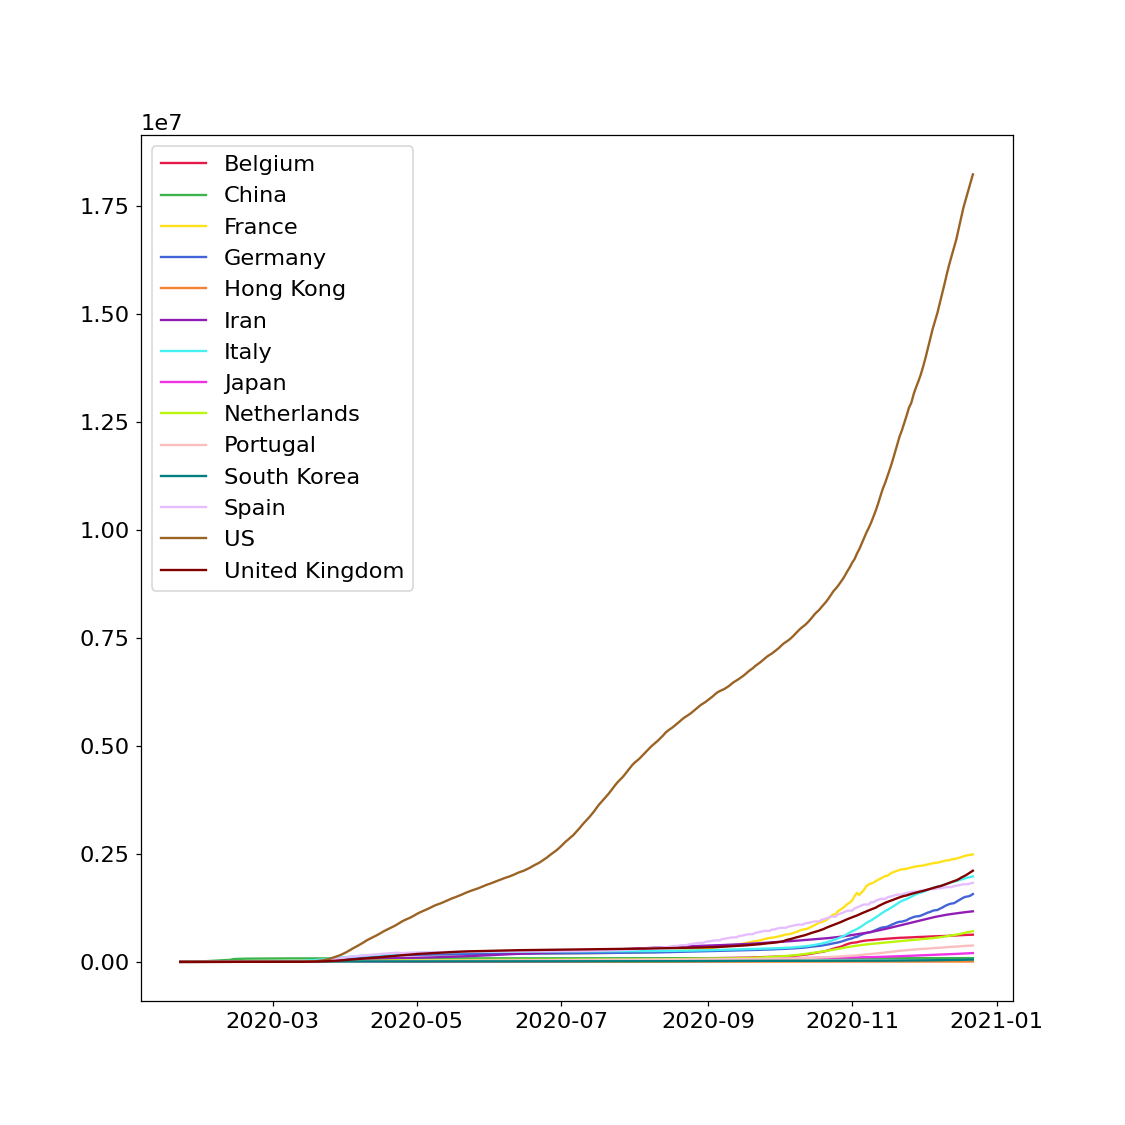

In [18]:
def show_plot(log_scale=False):
    plt.figure(figsize=(10,10))
    colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#800000', '#96e3ac', '#808000', '#ffd8b1', '#000075', '#808080']
    plt.rc('xtick', labelsize='x-large') 
    plt.rc('ytick', labelsize='x-large') 
    if log_scale:
        plt.yscale('log')

    for index, row in final_data.iterrows():
        plt.plot(dates, row[1:], label=row[0], color=colors[index])

    mplcursors.cursor(hover=True)
    plt.legend(fontsize='x-large')
    plt.show()

show_plot()

### Problem analysis - linear graph

The most prominent part of the graph above is the almost constant exponential growth in cases in the United States. If we zoom in on the part of the graph where the other regions can be seen (by using the 5th button under the plot and selecting X in range \[2020-08-15, present\] and Y in range \[0, 3.0e+6\]), we can notice that even in the countris that _flattened the curve_ over spring and summer, most of them started having a steeper growth between the beginning of september and end of october, notably only in European regions where most restrictions were lifted around this time. On the other hand, the observed regions in Asia (China, Hong Kong, South Korea and Japan) did not experience this growth.

<IPython.core.display.Javascript object>


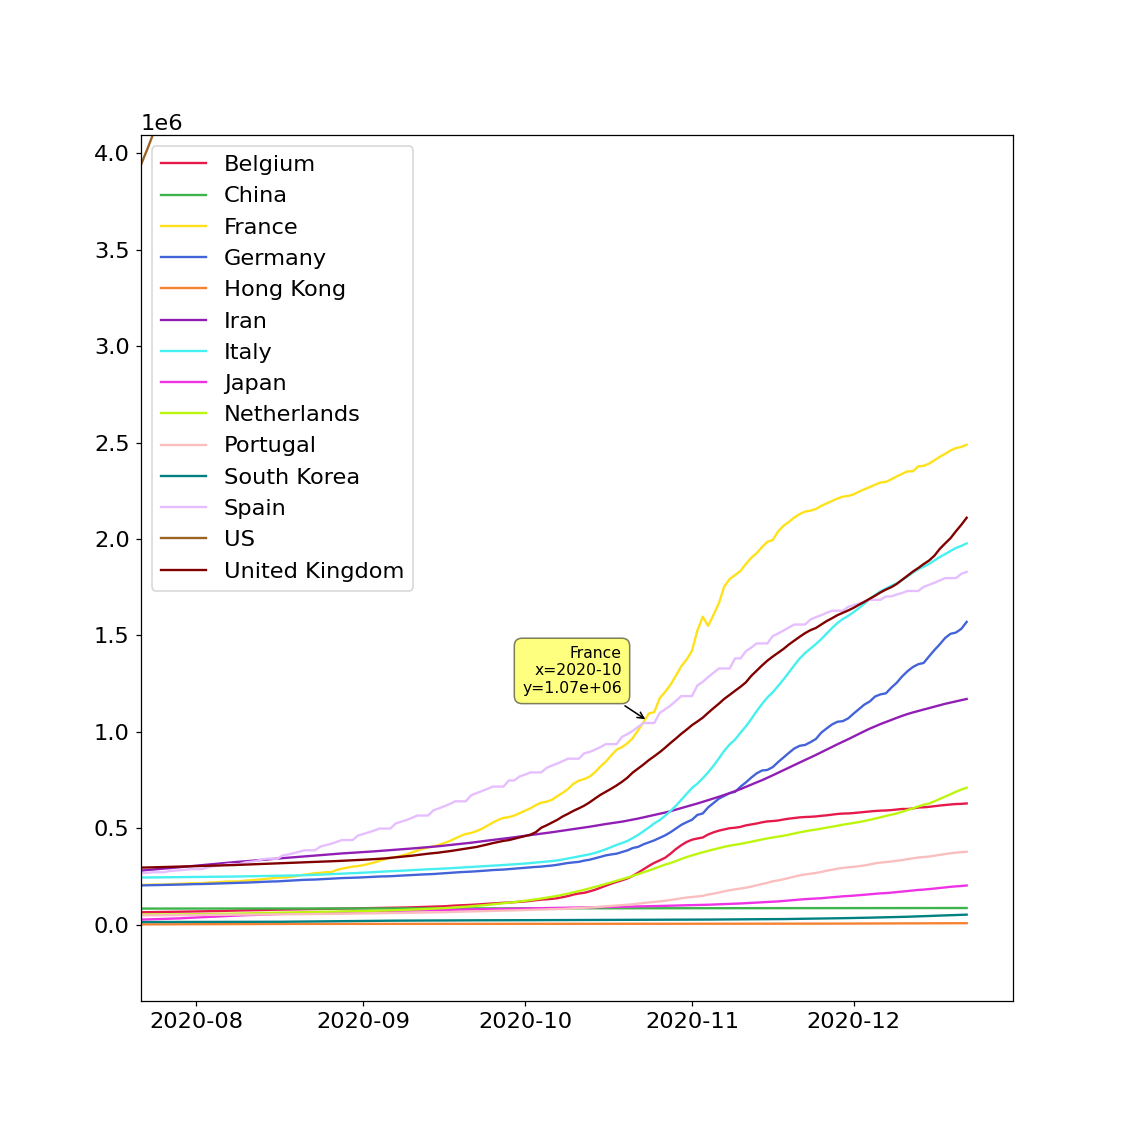

In [24]:
show_plot()

### Problem analysis - logarithmic graph

We repeat the same process as for the previous chart, except we set the scale for the Y axis to be logarithmic.

The logarithmic scale chart doesn't really tell us much about the relationship between the actual numbers of cases in different regions, but it allows us to compare the growth rate of values from the first chart. It can also tell us whether the protective measures and restrictions have any effect.

For most regions, except China, we can see that between 2020-01 and 2020-03 first cases appeared and were followed by steep growth for at least a month. By May, all regions except the United States mostly reduced the growth rate. Occasionaly a country would experience a growth in the rate, which would mean there was an epidemic _wave_ with most european countries having this wave in September and October, as discussed in relation to the previous graphs.

We can also interpret any decrease in the growth rate as preventive measures working - on Figure 4 we can see that halfway through the second lockdown in November, the steepnes of the line starts to decrease, meaning that the infection rate lowered.

For Mainland China and the United States, the graph is notably different from the rest. China, as the region where the infection is first detected had a high growth rate throught January and February and, as the country got a handle on the infection prevention measures, it has eversince had a completely flat line on this chart. The United States on the other hand, while it has decreased in april so that it is not vertical, it has maintained a mostly steady growth rate with no notable waves.

<IPython.core.display.Javascript object>


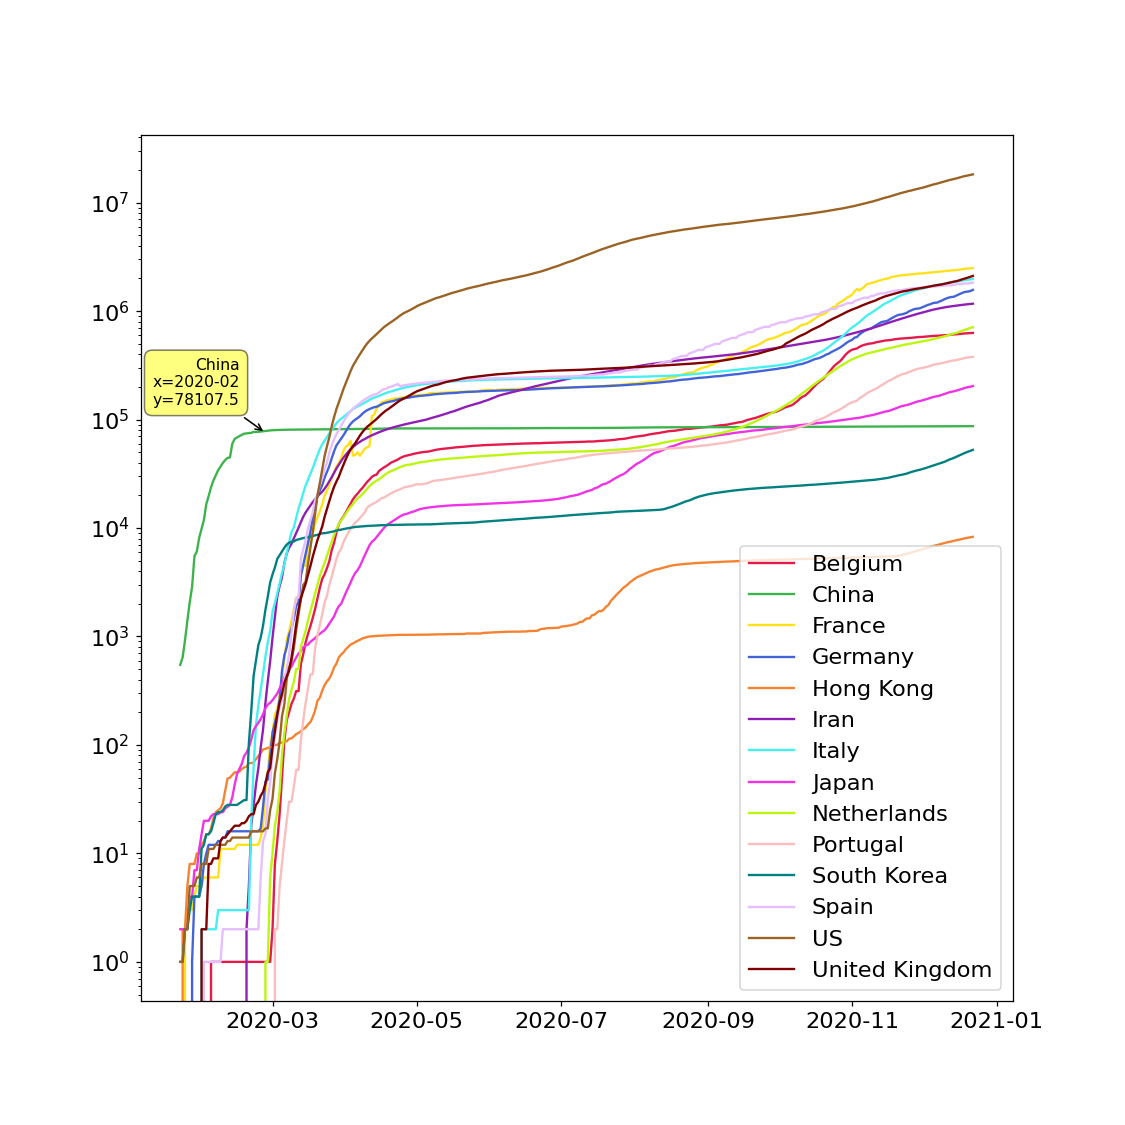

In [25]:
show_plot(log_scale=True)

<IPython.core.display.Javascript object>


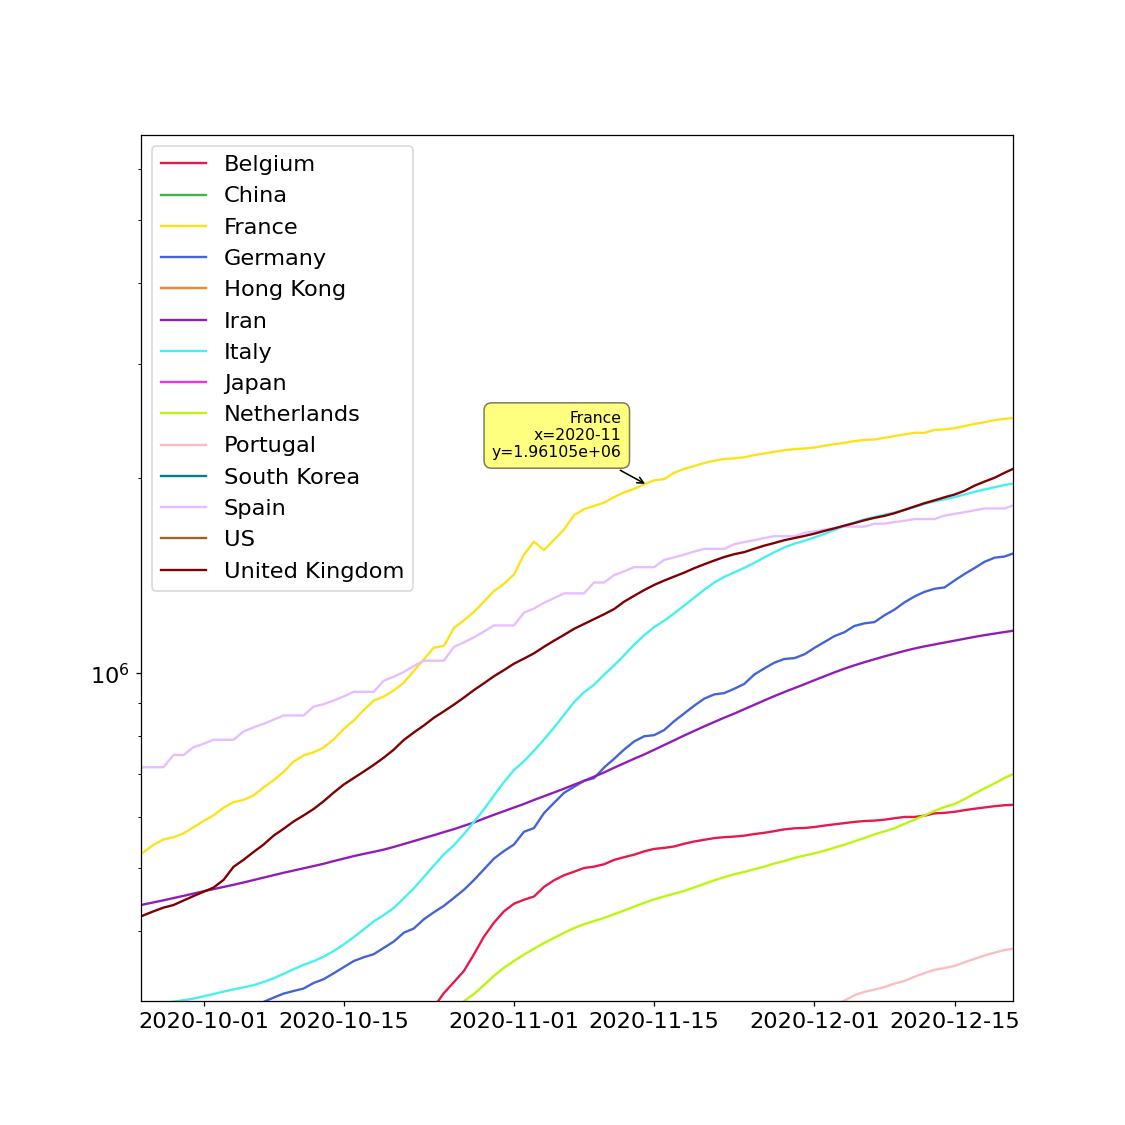

In [28]:
show_plot(log_scale=True)

## Bonus: Effect of the Covid pandemic on the overall death count in France

Additional data analysis that we can perform related to this topic is to compare the number of deaths in 2020 with the previous years and see if there is any correlation with the waves of the Covid epidemic. 

For this, we will use historical data for death count in France in 2020, 2019 and 2018 provided by [INSEE](https://www.insee.fr/fr/accueil) (_Institut national de la statistique et des études économiques_) on [this webpage](https://www.insee.fr/fr/statistiques/4487837?sommaire=4487854) in combination with daliy death reports from the John Hopkins University provided on their GitHub repository [here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv).

We will start by loading the historical data. The dataset contains cummulative death counts for the year on a given day for the period 1. March - 31. December. The data is provided both for the whole country (_Zone_ = 'France') and every department separately (_Zone_ = 'Dept_38').

In [144]:
data_url_death = './/2020-12-17_deces_quotidiens_departement_csv.csv'

data_frame_death = pd.read_csv(data_url_death, delimiter=';')
data_frame_death

,Date_evenement,Zone,Communes_a_envoi_dematerialise_Deces2020,Total_deces_2020,Communes_a_envoi_dematerialise_Deces2019,Total_deces_2019,Communes_a_envoi_dematerialise_Deces2018,Total_deces_2018
0,01-mars,France,1628.0,1782.0,1708,1872,1927,2136
1,02-mars,France,3268.0,3567.0,3467,3782,3932,4327
2,03-mars,France,4905.0,5340.0,5035,5530,5880,6455
3,04-mars,France,6593.0,7156.0,6747,7410,7767,8545
4,05-mars,France,8224.0,8938.0,8455,9278,9769,10746
...,...,...,...,...,...,...,...,...
31207,27-déc.,Dept_976,NaN,NaN,624,624,580,580
31208,28-déc.,Dept_976,NaN,NaN,627,627,581,581
31209,29-déc.,Dept_976,NaN,NaN,629,629,584,584
31210,30-déc.,Dept_976,NaN,NaN,630,630,585,585


As the set contains both aggregated data for the whole country, and separate data for each department, we will first filter out only the rows with aggregated data. We will also slice out only the columns with total counts for each year and perform a ```diff()``` operation on them in order to get the actual daily counts as the numbers in the file are cummulative. This means that from every row, we substract the previous row. We also transpose the resulting table for easier plotting later and we add a row with the dates to be used later for plot labels.

In [160]:
france_total_death = pd.DataFrame(data_frame_death.loc[data_frame_death['Zone'] == 'France'])

death_final = pd.DataFrame(france_total_death[['Total_deces_2020', 'Total_deces_2019', 'Total_deces_2018']]).transpose()

death_final = pd.DataFrame(france_total_death[['Date_evenement']].transpose()).append(death_final.diff(axis=1).fillna(death_final, axis=1))
death_final

,0,1,2,3,4,5,6,7,8,9,...,296,297,298,299,300,301,302,303,304,305
Date_evenement,01-mars,02-mars,03-mars,04-mars,05-mars,06-mars,07-mars,08-mars,09-mars,10-mars,...,22-déc.,23-déc.,24-déc.,25-déc.,26-déc.,27-déc.,28-déc.,29-déc.,30-déc.,31-déc.
Total_deces_2020,1782,1785,1773,1816,1782,1847,1694,1713,1830,1837,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_deces_2019,1872,1910,1748,1880,1868,1870,1859,1802,1774,1668,...,1782,1786,1772,1741,1800,1814,1826,1701,1884,1799
Total_deces_2018,2136,2191,2128,2090,2201,2158,2055,2107,2049,2086,...,1707,1719,1719,1695,1719,1774,1834,1722,1739,1863


Moving on, we will load the global daily Covid-related death count.

covid_death_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

covid_death = pd.read_csv(covid_death_url, delimiter=',')
covid_death.head()

From this data, we want to filter only rows with counts for France (both mainland and overseas territories) which we will then summarise, clean from unneccesairy columns - _Lat_, _Long_ and all data before 1st March 2020 and after 31st December 2020, in order to match the data span from the historical data set. Finally, since this dataset also has cummulative data, we want to perform the same ```diff()``` operation to get daily new death counts.

In [162]:
france_covid_death = covid_death[covid_death['Country/Region']=='France']
france_covid_death = france_covid_death.groupby("Country/Region").sum().drop(['Lat', 'Long'], axis=1)
france_covid_death = france_covid_death.drop(france_covid_death.columns[range(0, 39)], axis=1)
france_covid_death = france_covid_death.drop(france_covid_death.columns[range(len(death_final.columns), len(france_covid_death.columns))], axis=1).diff(axis=1)

france_covid_death

,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,...,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
France,NaN,1.0,1.0,0.0,3.0,2.0,7.0,3.0,6.0,8.0,...,344.0,376.0,791.0,290.0,261.0,612.0,189.0,131.0,354.0,802.0


**Optinal step**: since this document is being created in December before the end of 2020, we will currently have more columns in the historical dataset because the Covid-death dataset is missing the final few days of 2020 data. In order to plot correctly, here we truncate the historical dataset so that the lengths of both sets match.

In [163]:
death_final = death_final.drop(death_final.columns[range(len(france_covid_death.columns), len(death_final.columns))], axis=1)
death_final

,0,1,2,3,4,5,6,7,8,9,...,287,288,289,290,291,292,293,294,295,296
Date_evenement,01-mars,02-mars,03-mars,04-mars,05-mars,06-mars,07-mars,08-mars,09-mars,10-mars,...,13-déc.,14-déc.,15-déc.,16-déc.,17-déc.,18-déc.,19-déc.,20-déc.,21-déc.,22-déc.
Total_deces_2020,1782,1785,1773,1816,1782,1847,1694,1713,1830,1837,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_deces_2019,1872,1910,1748,1880,1868,1870,1859,1802,1774,1668,...,1864,1820,1699,1710,1847,1829,1812,1840,1806,1782
Total_deces_2018,2136,2191,2128,2090,2201,2158,2055,2107,2049,2086,...,1662,1642,1668,1750,1770,1775,1795,1766,1747,1707


Now that all of the data is ready, we can plot the data.

<IPython.core.display.Javascript object>


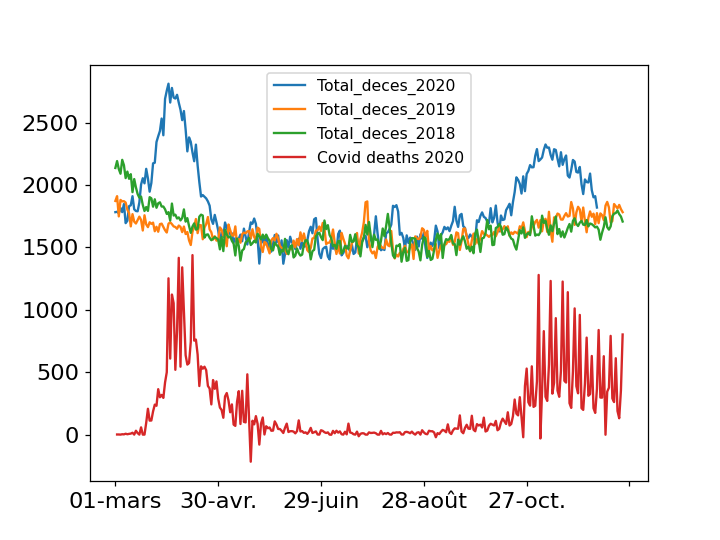

In [165]:
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(plt.MaxNLocator(6))

for index, row in death_final.iterrows():
    if index == 'Date_evenement':
        labels = row
    else:
        plt.plot(labels, row, label=index)
    
for index, row in france_covid_death.iterrows():
    plt.plot(labels, row, label="Covid deaths 2020")

mplcursors.cursor(hover=True)
plt.legend()
plt.show()

### Problem analysis
This chart shows us a very clear correlation between the two waves of Covid cases and the large increase in daily deaths relative to data from the same time period in the 2 years prior to the year of the Covid pandemic. These waves occured in March and April, and again in November and December.

The only other unusual peak in 2020 is between 8th and 13th of August and as in some of the previous years, can be related to a heatwave that occured around that time ([source](https://www.garda.com/crisis24/news-alerts/366546/france-heatwave-forecast-august-6-12))